In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

from scipy.cluster import hierarchy

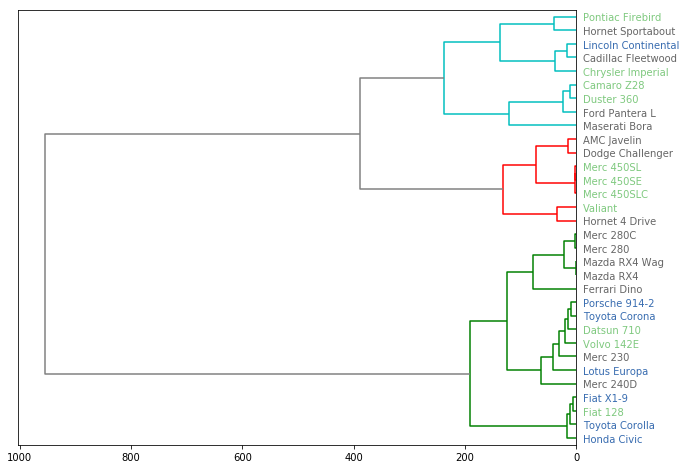

In [2]:
df = pd.read_csv('https://python-graph-gallery.com/wp-content/uploads/mtcars.csv')
df = df.set_index('model')
del df.index.name
# df
 
# Calculate the distance between each sample
Z = hierarchy.linkage(df, 'ward')

# Plot with Custom leaves
plt.figure(figsize=(10,8))
hierarchy.dendrogram(Z, labels=df.index, leaf_rotation=0, orientation="left", 
                     color_threshold=240, above_threshold_color='grey', leaf_font_size=10);

# Create a color palette with 3 color for the 3 cyl possibilities
my_palette = plt.cm.get_cmap("Accent", 3)
 
# transforme the 'cyl' column in a categorical variable. It will allow to put one color on each level.
df['cyl']=pd.Categorical(df['cyl'])
my_color=df['cyl'].cat.codes

# Apply the right color to each label
ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
num=-1
for lbl in xlbls:
    num+=1
    val=my_color[num]
    lbl.set_color(my_palette(val))